# Data Cleaning and Combining(DONE)

In [379]:
import pandas as pd

df = pd.read_csv('mars2021.csv')
y=2018
print(df)

        County     Jan     Feb     Mar    Apr     May    Jun     Jul     Aug  \
0       Apache       7       9       9     13      10     18      22      16   
1      Cochise      40      37      47     58      52     64      38      59   
2     Coconino      42      43      56     75      88    112      82      69   
3         Gila       7      15      17     23      25     25      16      28   
4       Graham      26      40      26     20      14     43      21      21   
5     Greenlee       *       *       *      6       *      0       *       *   
6       La Paz      10       7      11     18      10      9       8       *   
7     Maricopa   2,039   1,541   2,306  2,479   2,328  2,074   1,368   1,355   
8       Mohave      77      69     105    144     165    138      93      74   
9       Navajo      40      44      38     42      40     16      29      80   
10        Pima     378     279     461    307     214    367     316     290   
11       Pinal     122      96     171  

In [380]:
cols_to_check=df.columns
df[cols_to_check] = df[cols_to_check].replace({'†':''}, regex=True)
    

In [381]:
df

,County,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,TOTAL
0,Apache,7,9,9,13,10,18,22,16,24,11,13,11,163
1,Cochise,40,37,47,58,52,64,38,59,42,71,75,67,650
2,Coconino,42,43,56,75,88,112,82,69,100,130,78,73,948
3,Gila,7,15,17,23,25,25,16,28,32,31,30,13,262
4,Graham,26,40,26,20,14,43,21,21,18,20,18,*,270
5,Greenlee,*,*,*,6,*,0,*,*,*,8,10,*,50
6,La Paz,10,7,11,18,10,9,8,*,6,15,13,10,120
7,Maricopa,"2,039","1,541","2,306","2,479","2,328","2,074","1,368","1,355","1,564","2,742","2,896","2,777","25,469"
8,Mohave,77,69,105,144,165,138,93,74,94,160,135,98,"1,352"
9,Navajo,40,44,38,42,40,16,29,80,30,40,47,68,514


In [382]:
df_fips = pd.read_csv('county_fips_master.csv')
df_fips=df_fips[["fips","county_name","state_name"]]
df_fips_arizona=df_fips.loc[df_fips['state_name'] == "Arizona"]
df_fips_arizona=df_fips_arizona.reset_index()
df_fips_arizona

,index,fips,county_name,state_name
0,97,4001,Apache County,Arizona
1,98,4003,Cochise County,Arizona
2,99,4005,Coconino County,Arizona
3,100,4007,Gila County,Arizona
4,101,4009,Graham County,Arizona
5,102,4011,Greenlee County,Arizona
6,103,4012,La Paz County,Arizona
7,104,4013,Maricopa County,Arizona
8,105,4015,Mohave County,Arizona
9,106,4017,Navajo County,Arizona


In [383]:
for index, row in df_fips_arizona.iterrows():
#     print(index)
    s=df_fips_arizona.iloc[index]['county_name']
    x=s.split(" ")
    if x[len(x)-1]=="County":
        x=x[:-1]
    ans=""
    for a in x:
        ans+=a+" "
    ans=ans.strip()
    df_fips_arizona.at[index,'county_name']=ans
#     print(ans)
for index, row in df_fips_arizona.iterrows():
    df_fips_arizona.iloc[index]['county_name']=str(df_fips_arizona.iloc[index]['county_name'])

<ipython-input-383-8f0239f05c78>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fips_arizona.iloc[index]['county_name']=str(df_fips_arizona.iloc[index]['county_name'])


In [384]:
cnt=0
for index, row in df.iterrows():
#     print(cnt)
    cnt+=1
    df.iloc[index]['County'].strip()
    value=df_fips_arizona.where(df_fips_arizona.county_name == str(df.iloc[index]['County']))
    value=value.dropna()
#     print(value)
    value2=value.copy()
    value2=value['fips'].where(value.state_name == "Arizona")
    value2=value2.dropna()
    if value2.empty:
        value2="0"
    
#     print(value2)
    df.at[index,'fips']=str(int(value2))
print(df)

        County    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0       Apache      7      9      9     13     10     18     22     16     24   
1      Cochise     40     37     47     58     52     64     38     59     42   
2     Coconino     42     43     56     75     88    112     82     69    100   
3         Gila      7     15     17     23     25     25     16     28     32   
4       Graham     26     40     26     20     14     43     21     21     18   
5     Greenlee      *      *      *      6      *      0      *      *      *   
6       La Paz     10      7     11     18     10      9      8      *      6   
7     Maricopa  2,039  1,541  2,306  2,479  2,328  2,074  1,368  1,355  1,564   
8       Mohave     77     69    105    144    165    138     93     74     94   
9       Navajo     40     44     38     42     40     16     29     80     30   
10        Pima    378    279    461    307    214    367    316    290    321   
11       Pinal    122     96

In [385]:
df_census = pd.read_csv('census_county_interpolated.csv')

In [386]:
df_census

,fips,NAME,land_area,year,hispanic_pct,poverty,poverty_mcare,population,median_house_value,blk_pct,...,no_grad,no_grad_mcare,median_household_income,owner_occupied,median_age,age_pct_0_14,age_pct_15_44,age_pct_45_65,age_pct_65_plus,population_density
0,31039,Cuming County,570.524737,1999,0.054853,0.090024,0.078041,10201.298246,66046.393762,0.001272,...,0.241760,0.473548,33202.986355,0.713861,39.207992,0.218041,0.370865,0.208702,0.202392,17.880554
1,53069,Wahkiakum County,262.918905,1999,0.025632,0.080607,0.026789,3824.294347,147592.982456,0.002610,...,0.197601,0.275370,39443.575049,0.796416,44.412281,0.183003,0.325742,0.306549,0.184706,14.545528
2,35011,De Baca County,2323.107089,1999,0.352584,0.177245,0.149731,2239.403509,45840.545809,0.000451,...,0.285226,0.426788,25445.639376,0.779822,43.807407,0.185283,0.329334,0.231900,0.253483,0.963969
3,31109,Lancaster County,837.566633,1999,0.033735,0.095414,0.061067,250338.058480,105973.099415,0.028183,...,0.125136,0.189796,41866.309942,0.604841,31.999025,0.194963,0.498128,0.202712,0.104197,298.887335
4,31129,Nuckolls County,575.155247,1999,0.010073,0.112209,0.089259,5055.925926,33037.621832,0.000216,...,0.209822,0.333342,28964.077973,0.800201,44.106238,0.180126,0.333500,0.242750,0.243624,8.790541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64655,13123,Gilmer County,426.213128,2018,0.114598,0.163250,0.089043,29922.000000,171000.000000,0.004512,...,0.245524,0.159250,49389.000000,0.748390,46.900000,0.157710,0.314451,0.294265,0.233574,70.204313
64656,27135,Roseau County,1671.618527,2018,0.012418,0.097614,0.063721,15462.000000,125700.000000,0.008666,...,0.157683,0.155440,59644.000000,0.797832,41.400000,0.198357,0.342841,0.296533,0.162269,9.249718
64657,28089,Madison County,714.513624,2018,0.029508,0.108648,0.095087,103498.000000,215100.000000,0.380548,...,0.182156,0.163791,71690.000000,0.718298,37.000000,0.209647,0.400848,0.264623,0.124882,144.850982
64658,48227,Howard County,900.791485,2018,0.419833,0.167700,0.114719,36667.000000,93100.000000,0.062372,...,0.277927,0.244343,51528.000000,0.666002,36.600000,0.184498,0.428669,0.261489,0.125344,40.705314


In [387]:
cnt=0
df['Land'] = ''
df['Population'] = ''
df['Poverty'] = ''
df['Median_House_Income'] = ''
df['Median Age'] = ''
df['Popiulation Density'] = ''

for index, row in df.iterrows():
    print(cnt)
    cnt+=1
#     print(df_census.fips[2591],str(df.iloc[index]['fips']))
    if(int(df.iloc[index]['fips'])==0):
        continue
    value=df_census.where(df_census.fips == int(df.iloc[index]['fips']))
    value=value.dropna()
#     print(value)
    value2=value.copy()
#     print(value2)
    value2=value.where(value.year==y)
    value2=value2.dropna()
#     print(value2.iloc[0]['land_area'])
    df.at[index,'Land']=value2.iloc[0]['land_area']
    
#     value3=value.copy()
    value3=value.where(value.year==y)
    value3=value3.dropna()
#     print(df)
    df.at[index,'Population']=value3.iloc[0].population
    
#     value4=value.copy()
    value4=value.where(value.year==y)
    value4=value4.dropna()
    df.at[index,'Poverty']=value4.iloc[0].poverty
    
#     value5=value.copy()
    value5=value.where(value.year==y)
    value5=value5.dropna()
    df.at[index,'Median_House_Income']=value5.iloc[0].median_house_value
    
#     value6=value.copy()
    value6=value.where(value.year==y)
    value6=value6.dropna()
    df.at[index,'Median Age']=value6.iloc[0].median_age 
    
#     value7=value.copy()
    value7=value.where(value.year==y)
    value7=value7.dropna()
    df.at[index,'Popiulation Density']=value7.iloc[0].population_density 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [388]:
df.at[15,"fips"]=2021
df

,County,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Nov,Dec,TOTAL,fips,Land,Population,Poverty,Median_House_Income,Median Age,Popiulation Density
0,Apache,7,9,9,13,10,18,22,16,24,...,13,11,163,4001,11197.473011,71522.0,0.352801,62300.0,34.7,6.387334
1,Cochise,40,37,47,58,52,64,38,59,42,...,75,67,650,4003,6164.573275,126279.0,0.172191,143800.0,40.6,20.48463
2,Coconino,42,43,56,75,88,112,82,69,100,...,78,73,948,4005,18618.674331,140217.0,0.189345,261300.0,30.6,7.530987
3,Gila,7,15,17,23,25,25,16,28,32,...,30,13,262,4007,4757.996071,53400.0,0.224891,157600.0,49.7,11.223212
4,Graham,26,40,26,20,14,43,21,21,18,...,18,*,270,4009,4622.699913,37879.0,0.212864,127000.0,33.3,8.194129
5,Greenlee,*,*,*,6,*,0,*,*,*,...,10,*,50,4011,1841.978061,9504.0,0.118807,82400.0,34.2,5.159671
6,La Paz,10,7,11,18,10,9,8,*,6,...,13,10,120,4012,4499.629034,20701.0,0.22091,77600.0,56.0,4.600601
7,Maricopa,"2,039","1,541","2,306","2,479","2,328","2,074","1,368","1,355","1,564",...,"2,896","2,777","25,469",4013,9199.250934,4253913.0,0.147318,242700.0,36.1,462.419498
8,Mohave,77,69,105,144,165,138,93,74,94,...,135,98,"1,352",4015,13311.067062,206064.0,0.174763,151100.0,50.9,15.480652
9,Navajo,40,44,38,42,40,16,29,80,30,...,47,68,514,4017,9949.889427,108705.0,0.28527,118800.0,36.4,10.925247


In [389]:
df.to_csv("Marriage2021.csv")

# Marriages Total

In [42]:
import os
import pandas as pd
values_years={}
for filename in os.listdir("Marriages"):
    with open(os.path.join("Marriages", filename), 'r') as f:
        
        df = pd.read_csv(f)
# #         print(type(int(df.loc[15]['fips'])))
        b=str(df.loc[15]['TOTAL'])
        a=b.replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
#         values.append(int(a))
#         years.append(int(df.loc[15]['fips']))
#         print(df.loc[15]['TOTAL'],df.loc[15]['fips'])
#         text = f.read()
#         print(f)

In [43]:
print(values_years)
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
#     print ((i, key_value[i]), end =" ")
# print(values_years)
print(values,years)

{2010: 38076, 2011: 36713, 2013: 35791, 2012: 37064, 2016: 41105, 2017: 40939, 2015: 40439, 2014: 38911, 2019: 38599, 2018: 39691, 2020: 36870, 2021: 39450}
[38076, 36713, 37064, 35791, 38911, 40439, 41105, 40939, 39691, 38599, 36870, 39450] [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


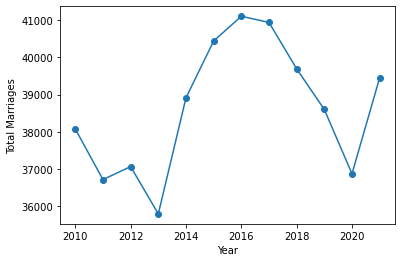

In [44]:
import matplotlib.pyplot as plt
plt.plot(years, values,marker='o')  # Plot the chart
plt.xlabel('Year')
plt.ylabel('Total Marriages')
plt.show() 

# Divorse Total

In [48]:
import os

values_years={}
for filename in os.listdir("Divorces"):
    with open(os.path.join("Divorces", filename), 'r') as f:
        df = pd.read_csv(f)
#         print(type(int(df.loc[15]['fips'])))
        
        a=df.loc[15]['TOTAL'].replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
#         values.append(int(a))
#         years.append(int(df.loc[15]['fips']))
#         print(df.loc[15]['TOTAL'],df.loc[15]['fips'])
#         text = f.read()
#         print(f)

In [49]:
print(values_years)
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
#     print ((i, key_value[i]), end =" ")
# print(values_years)
print(values,years)

{2013: 26037, 2012: 28072, 2010: 22479, 2011: 25438, 2015: 24434, 2014: 26199, 2016: 23442, 2017: 24430, 2019: 21224, 2018: 21187, 2020: 21980, 2021: 23030}
[22479, 25438, 28072, 26037, 26199, 24434, 23442, 24430, 21187, 21224, 21980, 23030] [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


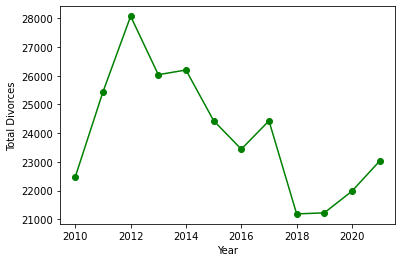

In [50]:
import matplotlib.pyplot as plt
plt.plot(years, values,marker='o',color='g')  # Plot the chart
plt.xlabel('Year')
plt.ylabel('Total Divorces')
plt.show() 

# Divorces All(State Wise)

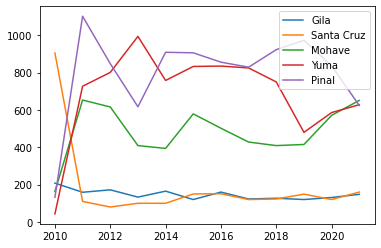

In [54]:
import os

values_years={}
cnt=0
l=""

for filename in os.listdir("Divorces"):
    with open(os.path.join("Divorces", filename), 'r') as f:
        df = pd.read_csv(f)
        a=df.loc[3]['TOTAL'].replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
        l=df.loc[3]['County']
cnt+=1
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
plt.plot(years, values,label=l)

for filename in os.listdir("Divorces"):
    with open(os.path.join("Divorces", filename), 'r') as f:
        df = pd.read_csv(f)
        a=df.loc[12]['TOTAL'].replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
        l=df.loc[12]['County']
cnt+=1
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
plt.plot(years, values,label=l)


for filename in os.listdir("Divorces"):
    with open(os.path.join("Divorces", filename), 'r') as f:
        df = pd.read_csv(f)
        a=df.loc[8]['TOTAL'].replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
        l=df.loc[8]['County']
cnt+=1
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
plt.plot(years, values,label=l)


for filename in os.listdir("Divorces"):
    with open(os.path.join("Divorces", filename), 'r') as f:
        df = pd.read_csv(f)
        a=df.loc[14]['TOTAL'].replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
        l=df.loc[14]['County']
cnt+=1
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
plt.plot(years, values,label=l)


for filename in os.listdir("Divorces"):
    with open(os.path.join("Divorces", filename), 'r') as f:
        df = pd.read_csv(f)
        a=df.loc[11]['TOTAL'].replace(",","")
        values_years[int(df.loc[15]['fips'])]=int(a)
        l=df.loc[11]['County']
cnt+=1
values=[]
years=[]
# values_years=sorted(values_years.keys())
for i in sorted(values_years.keys()) :
    years.append(i)
    values.append(values_years[i])
plt.plot(years, values,label=l)




plt.legend(loc="upper right")
plt.show()

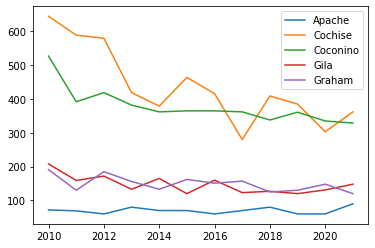

In [51]:
import os

values_years={}
cnt=0
l=""
for i in range(0,5):
    for filename in os.listdir("Divorces"):
        with open(os.path.join("Divorces", filename), 'r') as f:
            df = pd.read_csv(f)
            a=df.loc[i]['TOTAL'].replace(",","")
            values_years[int(df.loc[15]['fips'])]=int(a)
            l=df.loc[i]['County']
    cnt+=1
    values=[]
    years=[]
    # values_years=sorted(values_years.keys())
    for j in sorted(values_years.keys()) :
        years.append(j)
        values.append(values_years[j])
    plt.plot(years, values,label=l)
plt.legend(loc="upper right")
plt.show()

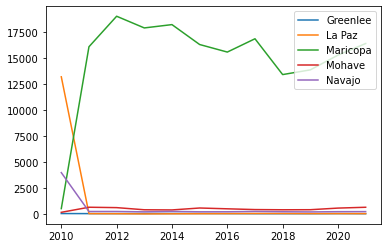

In [33]:
import os

values_years={}
cnt=0
l=""
for i in range(5,10):
    for filename in os.listdir("Divorces"):
        with open(os.path.join("Divorces", filename), 'r') as f:
            df = pd.read_csv(f)
            a=df.loc[i]['TOTAL'].replace(",","")
            values_years[int(df.loc[15]['fips'])]=int(a)
            l=df.loc[i]['County']
    cnt+=1
    values=[]
    years=[]
    # values_years=sorted(values_years.keys())
    for i in sorted(values_years.keys()) :
        years.append(i)
        values.append(values_years[i])
    plt.plot(years, values,label=l)
plt.legend(loc="upper right")
plt.show()

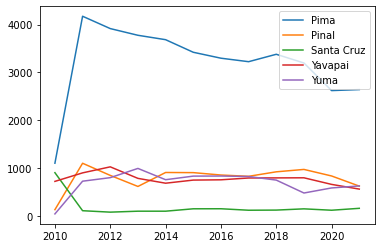

In [34]:
import os

values_years={}
cnt=0
l=""
for i in range(10,15):
    for filename in os.listdir("Divorces"):
        with open(os.path.join("Divorces", filename), 'r') as f:
            df = pd.read_csv(f)
            a=df.loc[i]['TOTAL'].replace(",","")
            values_years[int(df.loc[15]['fips'])]=int(a)
            l=df.loc[i]['County']
    cnt+=1
    values=[]
    years=[]
    # values_years=sorted(values_years.keys())
    for i in sorted(values_years.keys()) :
        years.append(i)
        values.append(values_years[i])
    plt.plot(years, values,label=l)
plt.legend(loc="upper right")
plt.show()